In [1]:
## Incluimos Rutas a los archivos necesarios:

TRAIN_PATH='TRAIN.csv'
DATA_ACCENTURE_PATH='frases.csv'

# Cargamos los datos

Comenzamos cargando las librerías y el dataset que hemos creado, para así poder entrenar el modelo.

In [2]:
#Importamos las librerías necesarias

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
#Cargamos el fichero con los datos

df = pd.read_csv(TRAIN_PATH)

#Cambiamos los nombres de las columnas a minúscula para evitarnos problemas en el futuro
df = df.rename(columns={'Frases': 'sentence', 'Tipo texto': 'source'})

Veamos que el dataset con el que vamos a trabajar está bien estructurado.

In [4]:
#Comprobamos que está bien procesado observando las primeras filas
df.head()

,sentence,source
0,"En el tribunal, el juez dictó una sentencia en...",IA
1,"El médico, en su consultorio, realizó un diagn...",IA
2,La densidad de la mama es la cantidad relativa...,Humano
3,"El bosque, un tapiz de árboles y hojas, era un...",IA
4,La ética de la virtud se centra en el desarrol...,IA


In [5]:
#Vamos a ver un ejemplo de cada 'source'

#Primero vemos el de IA

df.loc[df['source'] == "IA"].head()

,sentence,source
0,"En el tribunal, el juez dictó una sentencia en...",IA
1,"El médico, en su consultorio, realizó un diagn...",IA
3,"El bosque, un tapiz de árboles y hojas, era un...",IA
4,La ética de la virtud se centra en el desarrol...,IA
6,Se utiliza en la conducción autónoma para mejo...,IA


In [6]:
#Ahora de un texto de humano

df.loc[df['source'] == "Humano"].head()

,sentence,source
2,La densidad de la mama es la cantidad relativa...,Humano
5,"Según el Presidente iraquí Jalal Talabani, al ...",Humano
8,"Si hemos de creer las encuestas de opinión, el...",Humano
10,Los residentes locales dicen que los cortes en...,Humano
11,El Consejo de Ministros se encontró en el pala...,Humano


In [7]:
#Finalmente veamos la dimensión de los datos con los que estamos trabajando.

df.count()

sentence    2134
source      2134
dtype: int64

# Procesado de los datos

Vamos ahora a procesar los datos, de manera que obtengamos una representación más adecuada de los mismo a la hora de tratarlos.

In [8]:
#Vamos a llevar a cabo un primer pre-procesamiento simple

import re
def normalize_document(doc):

    #remove html tags (Los textos tienen etiquetas html que hacen la tokenizacion mas dificil)
    doc = re.sub(r'<[^>]+>','', doc)
    #remove withespaces and break lines
    doc = ' '.join(doc.strip().split())
    #remove special characters
    doc = doc.lower()

    return doc

normalize_corpus = np.vectorize(normalize_document)

Para poder entrenar y examinar adecuadamente, dividimos el conjunto de datos en dos partes. Una primera que vamos a utilizar para el entrenamiento, y una segunda que se usará para examinar el modelo.

In [9]:
#Vamos a dividir el dataset en un 99% - 1% para entrenamiento - test

RANDOM_STATE = 1234

from sklearn.model_selection import train_test_split

sentence_train, sentence_test, source_train, source_test = train_test_split(df['sentence'], df['source'], test_size=0.01, random_state=RANDOM_STATE)

In [10]:
#Primero normalizamos los datos de entrenamiento y test
train_corpus = normalize_corpus(sentence_train)
test_corpus = normalize_corpus(sentence_test)

# Representación simple con frecuencia

Vamos a transformar cada texto en un vector de palabras con su frecuencia de aparición.
 Las palabras que no aparecen en el texto pero sí en el resto del conjunto de datos tendrán valor 0.

In [11]:
#Vamos a llevar a cabo estas acciones con la librería Scikit-learn, en concreto con
#CountVectorizer. Veamos que pasa si no le proporcionamos un diccionario.

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_matrix = cv.fit_transform(train_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
#Sacamos las palabras propias del corpus
vocab = cv.get_feature_names_out()

#Mostramos los vectores de
pd.DataFrame(np.round(cv_matrix, 2), columns=vocab)

,00,000,00pm,10,100,1000,11,112,12,120,...,قوت,لا,لانه,لم,مدن,ولان,يجد,يعد,يومه,兰小欢
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Vamos a ver la palabra que aparece en más ocasiones.
#Sumamos todas las filas y comprobamos que palabra aparece mas en total

vocab[np.sum(cv_matrix,  axis=0).argmax()]

'de'

La palabra que más aparece es 'de', esto tiene sentido ya que no hemos eliminado las palabras genéricas del idioma. Vamos a ello.

In [14]:
#Vamos a modificar la función normalize_document para que retire
# las "stopwords"
import nltk
nltk.download('stopwords')

def normalize_document(doc, stopwords=nltk.corpus.stopwords.words('spanish')):

    #remove html tags (Los textos tienen etiquetas html que hacen la tokenizacion mas dificil)
    doc = re.sub(r'<[^>]+>','', doc)
    #remove withespaces and break lines
    doc = ' '.join(doc.strip().split())
    #remove special characters
    doc = doc.lower()
    # tokenize document
    tokens = nltk.WordPunctTokenizer().tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stopwords]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)

    return doc

normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alejandrogomezgomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Calculamos de nuevo la palabra que aparece mas veces
norm_corpus = normalize_corpus(train_corpus)

cv_matrix = cv.fit_transform(norm_corpus)

vocab = cv.get_feature_names_out()
vocab[np.sum(cv_matrix,  axis=0).argmax()]

'cada'

Vemos que ahora la palabra que más se repite es 'cada'. Una vez que hemos procesado los datos y hemos eliminado las palabras o símbolos que nos nos interesan, vamos a proceder a aplicar otras representaciones vectoriales.

In [16]:
#Antes de continuar vamos a aplicar lo que acabamos de hacer al resto de grupos de palabras
#con los que estamos trabajando.
train_corpus = normalize_corpus(train_corpus)
test_corpus = normalize_corpus(test_corpus)

# Representación con TDF-ID

En este caso contamos el número de veces que una palabra aparece en un texto, dividido entre el logaritmo del porcentaje del documentos del corpus que contienen dicho término.

In [17]:
#Utilizamos la función TfidVectorizer de la librería sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
tv_matrix = tv.fit_transform(norm_corpus)

#Nos quedamos con una pequeña parte para poder mostrarlo

partial_tv = tv_matrix[1:100].toarray()

vocabtv = tv.get_feature_names_out()

pd.DataFrame(np.round(partial_tv, 2), columns=vocabtv)

,00,000,00pm,10,100,1000,11,112,12,120,...,قوت,لا,لانه,لم,مدن,ولان,يجد,يعد,يومه,兰小欢
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Veamos la longitud de la lista
print(len(vocabtv))

9711


In [63]:
#Veamos una pequeña porción de las palabras con las que estamos trabajando

print("Primeras posiciones: ")
print(vocabtv[:20])
print("Últimas posiciones: ")
print(vocabtv[-20:])

Primeras posiciones: 
['00' '000' '00pm' '10' '100' '1000' '11' '112' '12' '120' '13' '132' '14'
 '1400' '143' '1492' '15' '150' '152' '159']
Últimas posiciones: 
['الكبرى' 'ان' 'بمنزلة' 'بوسعه' 'جمعة_الأرض' 'سوريا' 'صار' 'طعام' 'عديدة'
 'في' 'قوت' 'لا' 'لانه' 'لم' 'مدن' 'ولان' 'يجد' 'يعد' 'يومه' '兰小欢']


In [64]:
#Veamos ahora de nuevo que palabra aparece más, observamos que sigue siendo la misma

print("Por vectorización de bolsa de palabras:")
print(vocab[np.sum(train_vector_data,  axis=0).argmax()]) #por vectorizacion por bolsa de palabras
print("Por vectorización tdf-idf")
print(vocabtv[np.sum(tv_matrix,  axis=0).argmax()]) #por vectorizacion tf-idf

Por vectorización de bolsa de palabras:
cada
Por vectorización tdf-idf
cada


In [22]:
#Vamos a ver los terminos extraidos para los mensajes de antes.

import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.

    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask = vector_data[index,:]>0

    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))

    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, ':', data[index])

    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [65]:
#Mostramos la vectorización por bolsa de palabras
write_terms(vocab, norm_corpus, train_vector_data, 10)

Mensaje 10 : literatura ciencia ficción explora futuros alternativos avances tecnológicos . autores isaac asimov especulado robótica inteligencia artificial .
Mensaje 10 vectorizado: ['alternativos' 'artificial' 'asimov' 'autores' 'avances' 'ciencia'
 'especulado' 'explora' 'ficción' 'futuros' 'inteligencia' 'isaac'
 'literatura' 'robótica' 'tecnológicos'] 



In [66]:
#Mostramos la vectorización tf-idf
write_terms(vocabtv, norm_corpus, tv_matrix, 10)

Mensaje 10 : literatura ciencia ficción explora futuros alternativos avances tecnológicos . autores isaac asimov especulado robótica inteligencia artificial .
Mensaje 10 vectorizado: ['alternativos' 'artificial' 'asimov' 'autores' 'avances' 'ciencia'
 'especulado' 'explora' 'ficción' 'futuros' 'inteligencia' 'isaac'
 'literatura' 'robótica' 'tecnológicos'] 



Vemos que hemos conseguido en ambos casos un conjunto de palabras seleccionadas muy cuidado, son palabras que en sí mismas tienen significado y nos son útiles para discriminar mejor los temas o el tono del mensaje.

# Entrenando los modelos de aprendizaje automático

## Árboles de decisión.

In [67]:
#Definimos esta función para estudiar mejor los resultados
def print_top20_features_in_trees(vectorizer, clf):
    """Prints features with the highest coefficient values"""
    feature_names = vectorizer.get_feature_names_out()

    top20 = np.argsort(clf.feature_importances_)[-20:]
    reversed_top = top20[::-1]
    print("Top 20 features in the tree\n")
    print("%s" % ( " / ".join(feature_names[j] for j in reversed_top)))


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

def debug_print(predictions, target, target_names):
    print(classification_report(target, predictions, target_names=target_names))
    conf_matrix = confusion_matrix(target, predictions)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

    plt.figure(figsize=(15, 10))
    sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)

  #Función que vamos a utilizar posteriormente para encontrar aquellos valores que no concuerdon con los resultados del test.
def get_wrong_predictions(predictions, target, data):
    wrong = (predictions != target)
    return data[wrong], target[wrong]

In [68]:
from sklearn import tree

# Empezamos con la bolsa de palabras
cv_matrix_train = cv.fit_transform(train_corpus)
cv_matrix_test = cv.transform(test_corpus)

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(cv_matrix_train, source_train)


tree_train_predictions = tree_classifier.predict(cv_matrix_train)
tree_test_predictions = tree_classifier.predict(cv_matrix_test)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == source_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == source_test))

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.7727272727272727


              precision    recall  f1-score   support

      Humano       0.79      0.85      0.81        13
          IA       0.75      0.67      0.71         9

    accuracy                           0.77        22
   macro avg       0.77      0.76      0.76        22
weighted avg       0.77      0.77      0.77        22



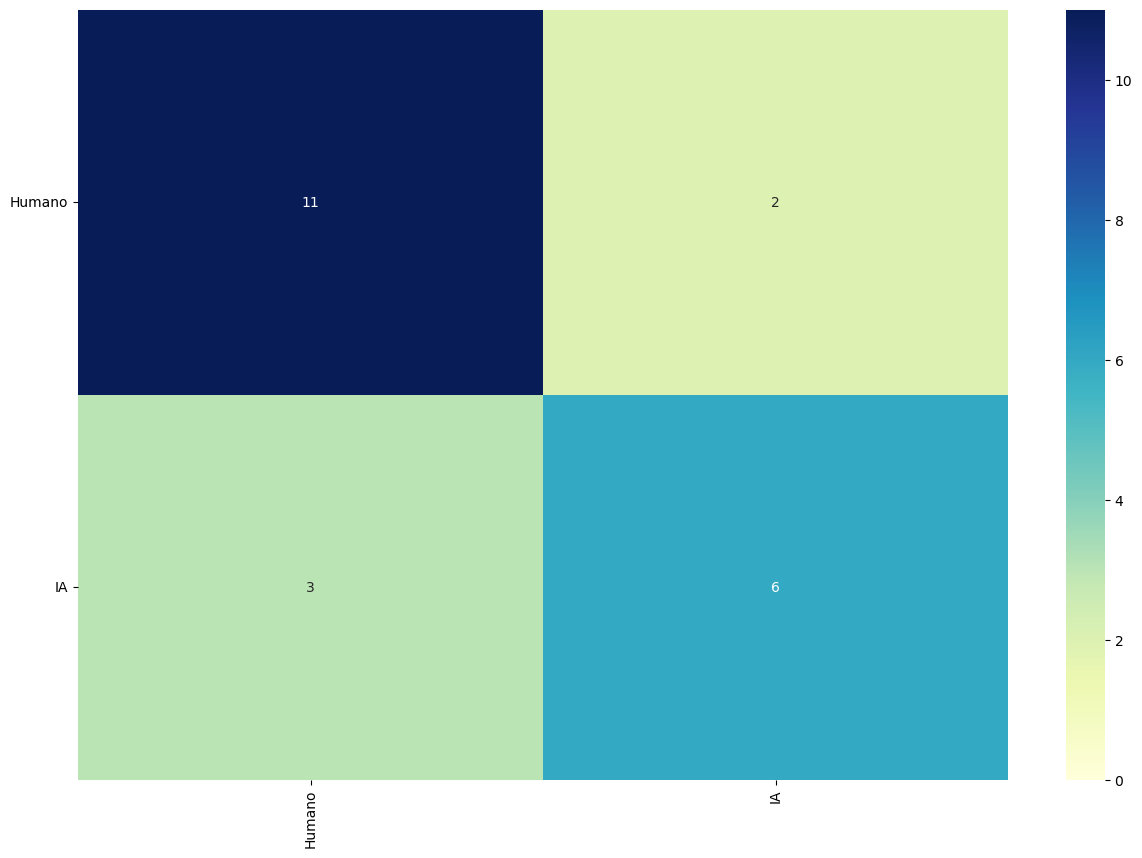

In [69]:
%matplotlib inline
debug_print(tree_test_predictions, source_test, ['Humano', 'IA'])

In [70]:
original_values = ['Humano', 'IA']

#Vamos a sacar algunas predicciones en las que nuestro modelo se ha equivocado.
d, t = get_wrong_predictions(tree_test_predictions, source_test, sentence_test)

d1, d0 = d[t =='Humano'], d[t=='IA']

if(len(d1)>0): print("Se esperaba: ", original_values[1], " y se predijo: ", original_values[0], " para:\n ", d1[d1.index[0]])
print("\n")
if(len(d0)>0): print("Se esperaba: ", original_values[0], " y se predijo: ", original_values[1], " para:\n ", d0[d0.index[0]])

Se esperaba:  IA  y se predijo:  Humano  para:
  Por el momento, ni Facebook ni Instagram tiene una política que prohíba el desarrollo de herramientas para acceder a los datos del usuario a efectos de vigilancia, según ACLU.


Se esperaba:  Humano  y se predijo:  IA  para:
  La cafetería en la esquina de la calle era un lugar de encuentro para los habitantes del barrio. Las conversaciones y risas llenaban el ambiente con calidez.


In [71]:
#Mostramos las palabras clave en el árbol con bolsa de palabras.
print_top20_features_in_trees(cv, tree_classifier)

Top 20 features in the tree

cada / inteligencia / autor / vida / ciencia / arte / cielo / rincón / secretos / psicología / medicina / música / personajes / sostenible / comprensión / naturaleza / investigación / desafíos / orador / consejos


In [72]:
# Vamos ahora a utilizar el dataset de Accenture para ver como funciona.

dfAccenture = pd.read_csv(DATA_ACCENTURE_PATH)

test_accenture=np.array(dfAccenture['Frases'])

norm_test_corpus_accenture = normalize_corpus(np.array(dfAccenture['Frases']))
type_test_accenture = np.array(dfAccenture['Tipo texto'])

cv_matrix_test = cv.transform(norm_test_corpus_accenture)
tree_test_predictions = tree_classifier.predict(cv_matrix_test)
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == type_test_accenture))

Árbol, porcentaje de aciertos en test: 0.7394957983193278


              precision    recall  f1-score   support

      Humano       0.86      0.60      0.70        62
          IA       0.67      0.89      0.77        57

    accuracy                           0.74       119
   macro avg       0.77      0.75      0.74       119
weighted avg       0.77      0.74      0.73       119



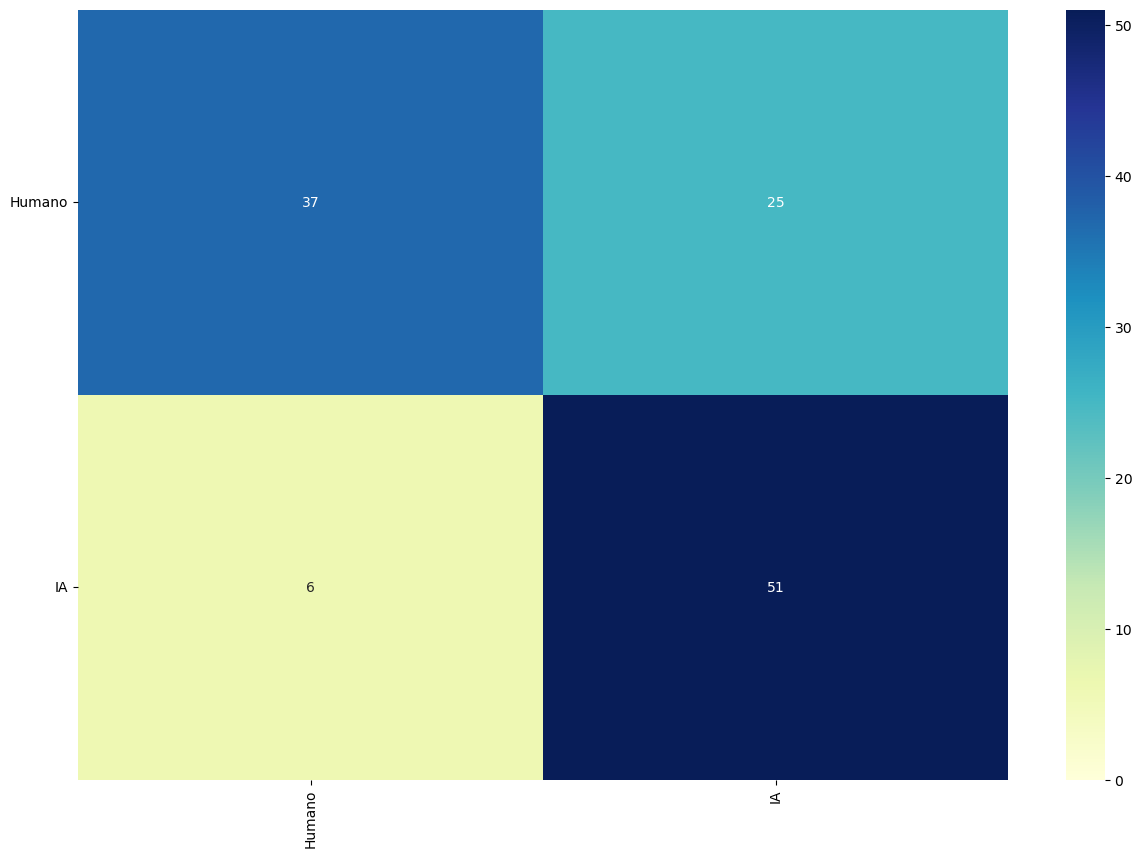

In [73]:
%matplotlib inline
debug_print(tree_test_predictions, type_test_accenture, ['Humano', 'IA'])

In [74]:
original_values = ['Humano', 'IA']

#Vamos a sacar algunas predicciones en las que nuestro modelo se ha equivocado.
d, t = get_wrong_predictions(tree_test_predictions, type_test_accenture, test_accenture)

d1, d0 = d[t =='Humano'], d[t=='IA']

if(len(d1)>0): print("Se esperaba: ", original_values[1], " y se predijo: ", original_values[0], " para:\n ", d1[0])
print("\n")
if(len(d0)>0): print("Se esperaba: ", original_values[0], " y se predijo: ", original_values[1], " para:\n ", d0[0])

Se esperaba:  IA  y se predijo:  Humano  para:
  El campo estaba en un valle rodeado de montañas nevadas. Era muy colorido porque había plantaciones de muchos tipos de flores y, por eso, olía muy bien. A la izquierda del camino que cruzaba este extenso lugar había una cabaña que tenía una chimenea que echaba humo. Al lado de la cabaña había dos caballos que tomaban agua de un pequeño arroyo. No había personas fuera de la casa, pero la puerta estaba abierta.


Se esperaba:  Humano  y se predijo:  IA  para:
  El último habitante de un pequeño pueblo en el oeste de Estados Unidos era un anciano que había vivido allí durante décadas. La población había disminuido gradualmente a medida que los jóvenes se marchaban en busca de oportunidades en la ciudad. Pero cuando llegó un desconocido con una oferta para comprar la tierra, el anciano se aferró a su hogar y a los recuerdos que contenía. A medida que luchaba contra los intentos de desalojo, comenzó a desentrañar la historia oculta de su pueb

[Text(0.5833333333333334, 0.9, 'x[1357] <= 0.5\ngini = 0.5\nsamples = 2112\nvalue = [1058, 1054]'),
 Text(0.35714285714285715, 0.7, 'x[5040] <= 0.5\ngini = 0.493\nsamples = 1870\nvalue = [1043, 827]'),
 Text(0.19047619047619047, 0.5, 'x[1012] <= 0.5\ngini = 0.488\nsamples = 1801\nvalue = [1041, 760]'),
 Text(0.09523809523809523, 0.3, 'x[9409] <= 0.5\ngini = 0.481\nsamples = 1742\nvalue = [1039, 703]'),
 Text(0.047619047619047616, 0.1, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.2857142857142857, 0.3, 'x[5962] <= 0.5\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(0.23809523809523808, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.5238095238095238, 0.5, 'x[4846] <= 0.5\ngini = 0.056\nsamples = 69\nvalue = [2, 67]'),
 Text(0.47619047619047616, 0.3, 'x[8864] <= 0.5\ngini = 0.029\nsamples = 68\nvalue = [1, 67]'),
 Text(0.42857142857142855, 0.1, '\n  (...)  \n'),
 Text(0.5238095238095238, 0.1, '\n  (...)  \n'),
 Text(0.5

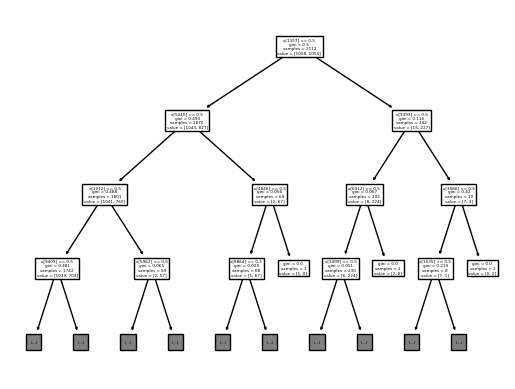

In [75]:
#Utilizamos esta función para que nos muestre los primeros niveles del árbol con 
#el que estamos trabajando.
tree.plot_tree(tree_classifier, max_depth=3)

Ahora vamos a probar de nuevo con árboles, pero en este caso vamos a utilizar la representación TF_IDF

In [34]:
# Usamos la vectorizacion tf-idf, seguimos el mismo esquema.
tv_matrix_train = tv.fit_transform(train_corpus)
tv_matrix_test = tv.transform(test_corpus)

# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(tv_matrix_train, source_train)

tree_train_predictions = tree_classifier.predict(tv_matrix_train)
tree_test_predictions = tree_classifier.predict(tv_matrix_test)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == source_train))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == source_test))

Árbol, porcentaje de aciertos en entrenamiento: 1.0
Árbol, porcentaje de aciertos en test: 0.9545454545454546


              precision    recall  f1-score   support

      Humano       0.93      1.00      0.96        13
          IA       1.00      0.89      0.94         9

    accuracy                           0.95        22
   macro avg       0.96      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



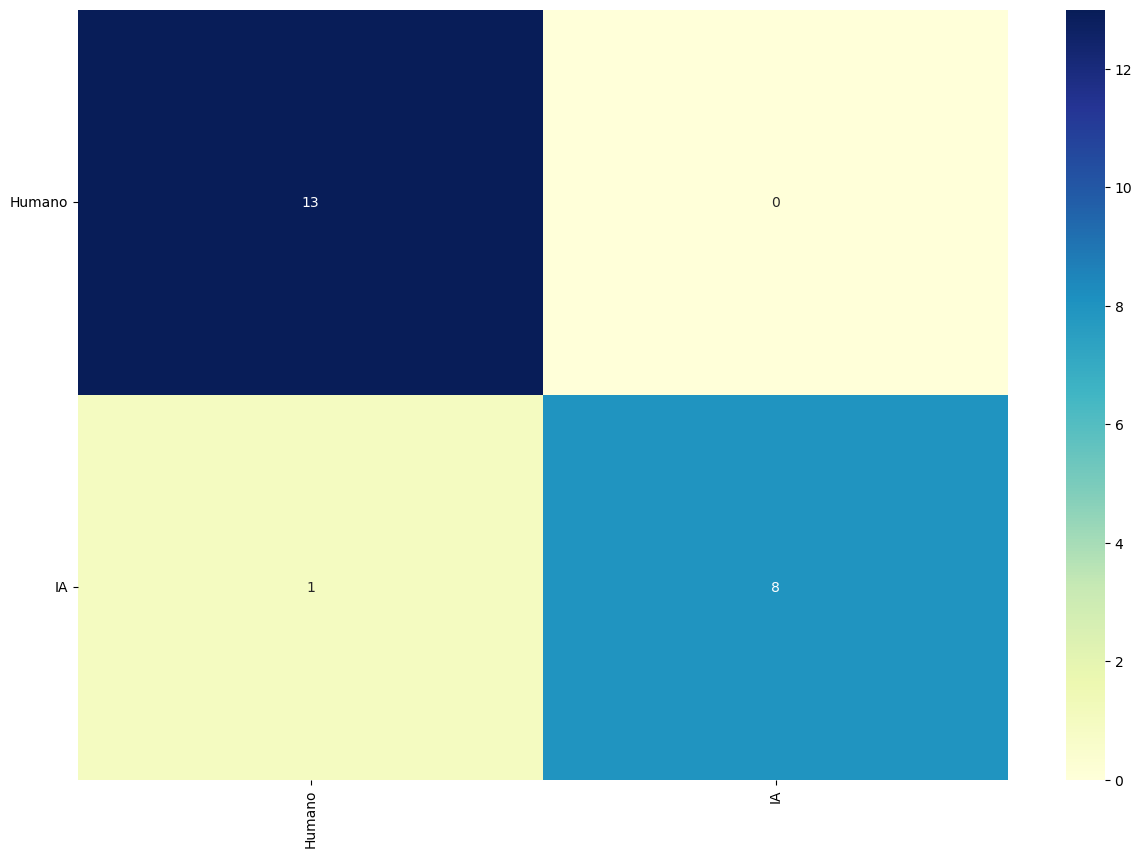

In [35]:
%matplotlib inline
debug_print(tree_test_predictions, source_test, ['Humano', 'IA'])

Observamos que los resultados obtenidos son prácticamente iguales.

In [36]:
d, t = get_wrong_predictions(tree_test_predictions, source_test, sentence_test)

d1, d0 = d[t=='Humano'], d[t=='IA']

if(len(d1)>0): print("Se esperaba: ", original_values[1], " y se predijo: ", original_values[0], " para:\n ", d1[d1.index[0]])
print("\n")
if(len(d0)>0): print("Se esperaba: ", original_values[0], " y se predijo: ", original_values[1], " para:\n ", d0[d0.index[0]])





Se esperaba:  Humano  y se predijo:  IA  para:
  La cafetería en la esquina de la calle era un lugar de encuentro para los habitantes del barrio. Las conversaciones y risas llenaban el ambiente con calidez.


In [37]:
#Mostramos las palabras clave en el árbol con tdf-id.
print_top20_features_in_trees(tv, tree_classifier)

Top 20 features in the tree

cada / inteligencia / autor / vida / ciencia / rincón / cielo / arte / secretos / música / desafíos / medicina / psicología / sostenible / personajes / viaje / comprensión / mundo / naturaleza / investigación


Observamos que en ambos aparecen palabras repetidas, pero difieren en orden de importancia a medida que descendemos en el árbol.

In [38]:
# Vamos ahora a utilizar el dataset de accenture para ver como funciona.

tv_matrix_test = tv.transform(norm_test_corpus_accenture)
tree_test_predictions = tree_classifier.predict(tv_matrix_test)
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == type_test_accenture))

Árbol, porcentaje de aciertos en test: 0.7478991596638656


              precision    recall  f1-score   support

      Humano       0.81      0.68      0.74        62
          IA       0.70      0.82      0.76        57

    accuracy                           0.75       119
   macro avg       0.75      0.75      0.75       119
weighted avg       0.76      0.75      0.75       119



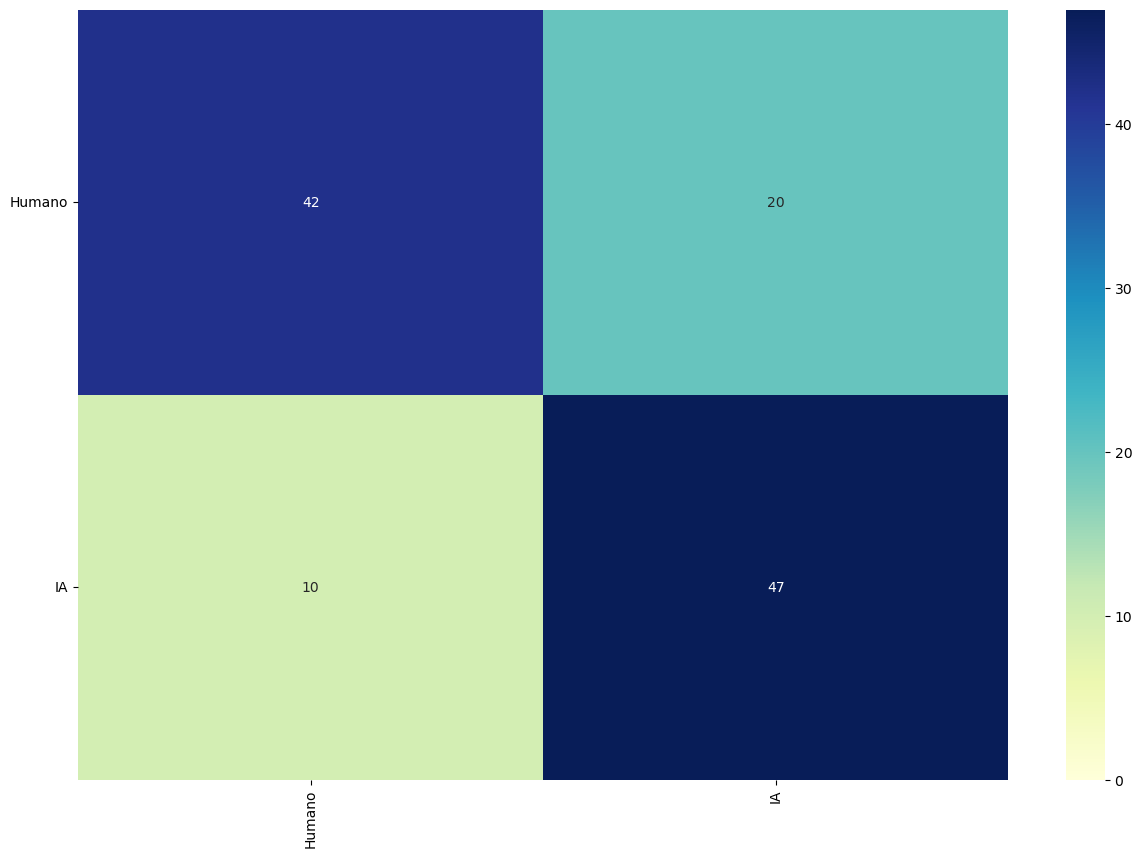

In [39]:
%matplotlib inline
debug_print(tree_test_predictions, type_test_accenture, ['Humano', 'IA'])

In [40]:
original_values = ['Humano', 'IA']

#Vamos a sacar algunas predicciones en las que nuestro modelo se ha equivocado.
d, t = get_wrong_predictions(tree_test_predictions, type_test_accenture, test_accenture)

d1, d0 = d[t =='Humano'], d[t=='IA']

if(len(d1)>0): print("Se esperaba: ", original_values[1], " y se predijo: ", original_values[0], " para:\n ", d1[0])
print("\n")
if(len(d0)>0): print("Se esperaba: ", original_values[0], " y se predijo: ", original_values[1], " para:\n ", d0[0])

Se esperaba:  IA  y se predijo:  Humano  para:
  El cazador había perdido todas sus herramientas de caza, pero se dio cuenta de que no las necesitaba porque podía alimentarse de las frutas que crecían en los árboles. Se puso muy contento con esta determinación y decidió que, cuando llegara a la ciudad, les diría a sus amigos que no practicaría esta actividad nunca más, porque había aprendido a respetar a la naturaleza.


Se esperaba:  Humano  y se predijo:  IA  para:
  En una ciudad futurista donde la tecnología había avanzado más allá de la imaginación, un joven científico trabajaba incansablemente en su laboratorio subterráneo. Había descubierto una forma revolucionaria de viajar en el tiempo, pero su invención era peligrosa y planteaba preguntas éticas fundamentales. Mientras los poderes gubernamentales y corporativos intentaban apoderarse de su descubrimiento, él se debatía entre la promesa de cambiar el pasado y el temor de alterar el curso de la historia de la humanidad de manera

[Text(0.5833333333333334, 0.9, 'x[1357] <= 0.039\ngini = 0.5\nsamples = 2112\nvalue = [1058, 1054]'),
 Text(0.35714285714285715, 0.7, 'x[5040] <= 0.077\ngini = 0.493\nsamples = 1870\nvalue = [1043, 827]'),
 Text(0.19047619047619047, 0.5, 'x[1012] <= 0.075\ngini = 0.488\nsamples = 1801\nvalue = [1041, 760]'),
 Text(0.09523809523809523, 0.3, 'x[9409] <= 0.144\ngini = 0.481\nsamples = 1742\nvalue = [1039, 703]'),
 Text(0.047619047619047616, 0.1, '\n  (...)  \n'),
 Text(0.14285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.2857142857142857, 0.3, 'x[1603] <= 0.148\ngini = 0.065\nsamples = 59\nvalue = [2, 57]'),
 Text(0.23809523809523808, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.5238095238095238, 0.5, 'x[7973] <= 0.14\ngini = 0.056\nsamples = 69\nvalue = [2, 67]'),
 Text(0.47619047619047616, 0.3, 'x[6408] <= 0.142\ngini = 0.029\nsamples = 68\nvalue = [1, 67]'),
 Text(0.42857142857142855, 0.1, '\n  (...)  \n'),
 Text(0.5238095238095238, 0.1, '\n  (...)  \n

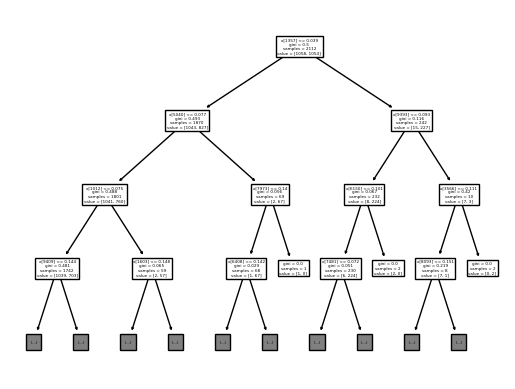

In [41]:
#Utilizamos esta función para que nos muestre los primeros niveles del árbol con 
#el que estamos trabajando.
tree.plot_tree(tree_classifier, max_depth=3)

## Naive Bayes

In [42]:
def print_top20_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    print("Top 20 features per class\n")
    for i, class_label in enumerate(class_labels):
        top20 = np.argsort(clf.feature_log_prob_[i])[-20:]
        reversed_top = top20[::-1]

        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')

        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [43]:
from sklearn.naive_bayes import MultinomialNB

# Empezamos con la bolsa de palabras

mnb_classifier = MultinomialNB()


cv_matrix_test = cv.transform(test_corpus)

mnb_classifier.fit(cv_matrix_train, source_train)

mnb_train_predictions = mnb_classifier.predict(cv_matrix_train)
mnb_test_predictions = mnb_classifier.predict(cv_matrix_test)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == source_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == source_test))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9947916666666666
Multinomial Naive Bayes, porcentaje de aciertos en test: 1.0


Vemos que obtenemos mejores resultados, probablemente porque no hemos sobreaprendido tanto, como ocurría con los árboles.

In [44]:
print_top20_features_per_class_in_NB(cv, mnb_classifier, ['Humano', 'IA'])

Top 20 features per class

Humano: si / gobierno / ser / país / puede / mundo / países / años / vez / así / embargo / año / personas / dos / sido / unidos / gente / cómo / gran / hecho 

IA: cada / vida / mundo / inteligencia / artificial / historia / autor / arte / tiempo / música / rincón / forma / tecnología / ciencia / investigación / salud / naturaleza / personajes / desafíos / cielo 



              precision    recall  f1-score   support

      Humano       1.00      1.00      1.00        13
          IA       1.00      1.00      1.00         9

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



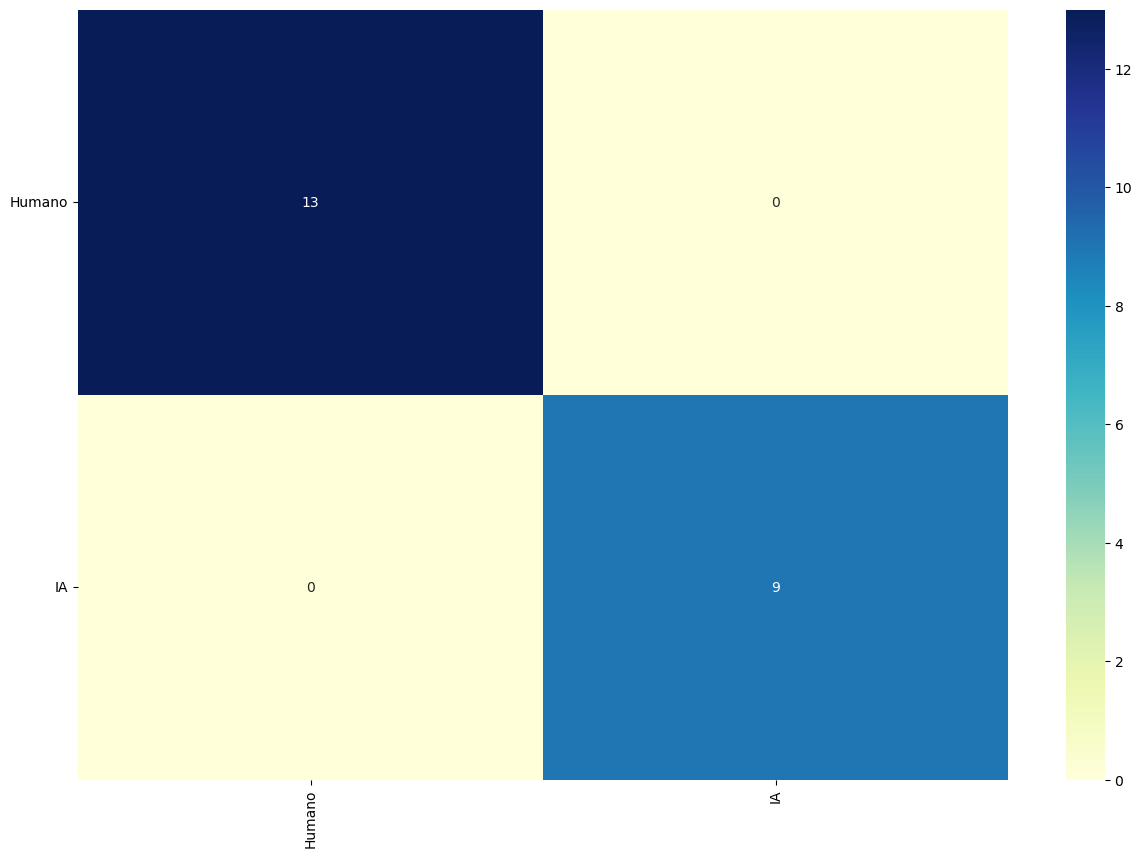

In [45]:
%matplotlib inline
debug_print(mnb_test_predictions, source_test, ['Humano', 'IA'])

In [46]:
d, t = get_wrong_predictions(mnb_test_predictions, source_test, sentence_test)

d1, d0 = d[t == 'Humano'], d[t == 'IA']

if(len(d1)>0): print("Se esperaba: ", original_values[1], " y se predijo: ", original_values[0], " para:\n ", d1[d1.index[0]])
print("\n")
if(len(d0)>0): print("Se esperaba: ", original_values[0], " y se predijo: ", original_values[1], " para:\n ", d0[d0.index[0]])

In [47]:
cv_matrix_test = cv.transform(norm_test_corpus_accenture)

mnb_test_predictions = mnb_classifier.predict(cv_matrix_test)

print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == type_test_accenture))

Multinomial Naive Bayes, porcentaje de aciertos en test: 0.8739495798319328


              precision    recall  f1-score   support

      Humano       0.96      0.79      0.87        62
          IA       0.81      0.96      0.88        57

    accuracy                           0.87       119
   macro avg       0.88      0.88      0.87       119
weighted avg       0.89      0.87      0.87       119



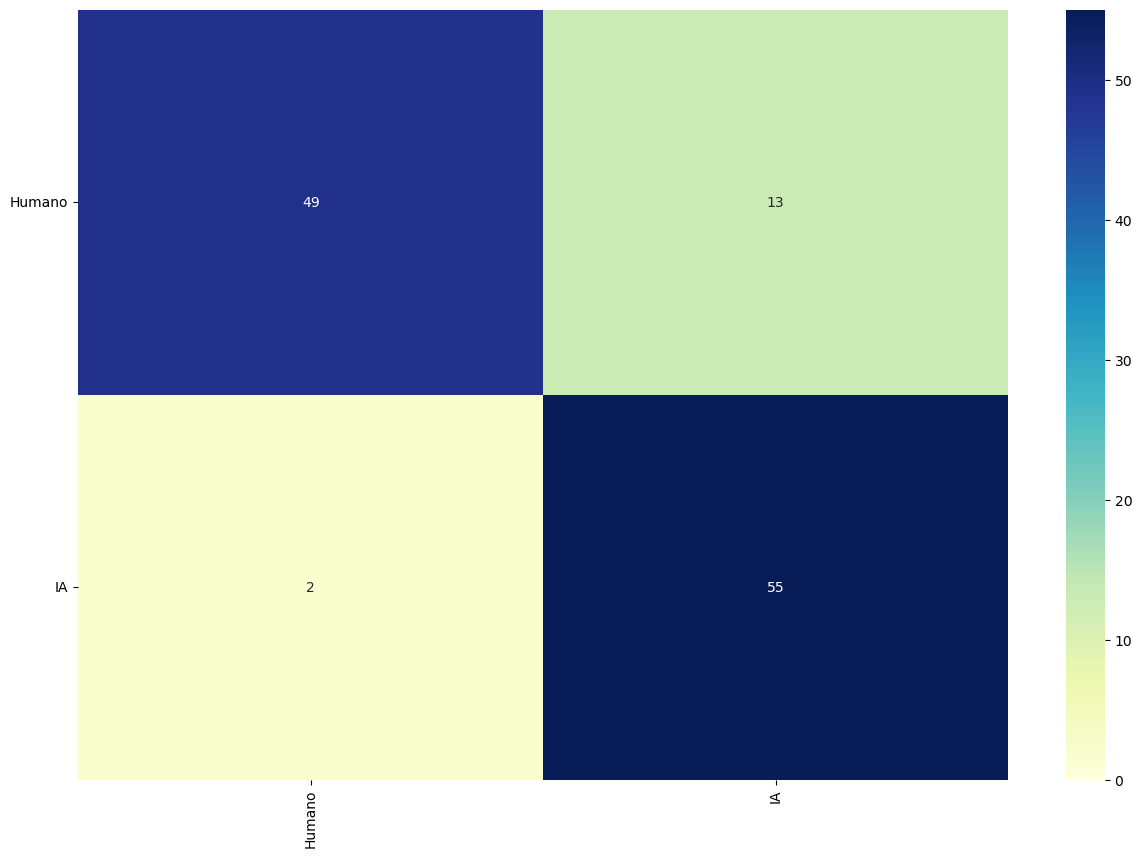

In [48]:
%matplotlib inline
debug_print(mnb_test_predictions, type_test_accenture, ['Humano', 'IA'])

In [55]:
# Usamos ahora la vectorizacion tf-idf
tv_matrix_test = tv.transform(test_corpus)


mnb_classifier = MultinomialNB()

mnb_classifier.fit(tv_matrix_train, source_train)

mnb_train_predictions = mnb_classifier.predict(tv_matrix_train)
mnb_test_predictions = mnb_classifier.predict(tv_matrix_test)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == source_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == source_test))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9933712121212122
Multinomial Naive Bayes, porcentaje de aciertos en test: 1.0


In [56]:
print_top20_features_per_class_in_NB(cv, mnb_classifier, ['Humano', 'IA'])

Top 20 features per class

Humano: gobierno / si / ser / país / países / puede / años / vez / mundo / así / embargo / año / unidos / sido / gente / personas / parte / dos / hecho / internet 

IA: cada / vida / inteligencia / mundo / artificial / historia / autor / arte / ciencia / tecnología / música / rincón / forma / tiempo / salud / investigación / enfermedades / desafíos / impacto / personajes 



              precision    recall  f1-score   support

      Humano       1.00      1.00      1.00        13
          IA       1.00      1.00      1.00         9

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



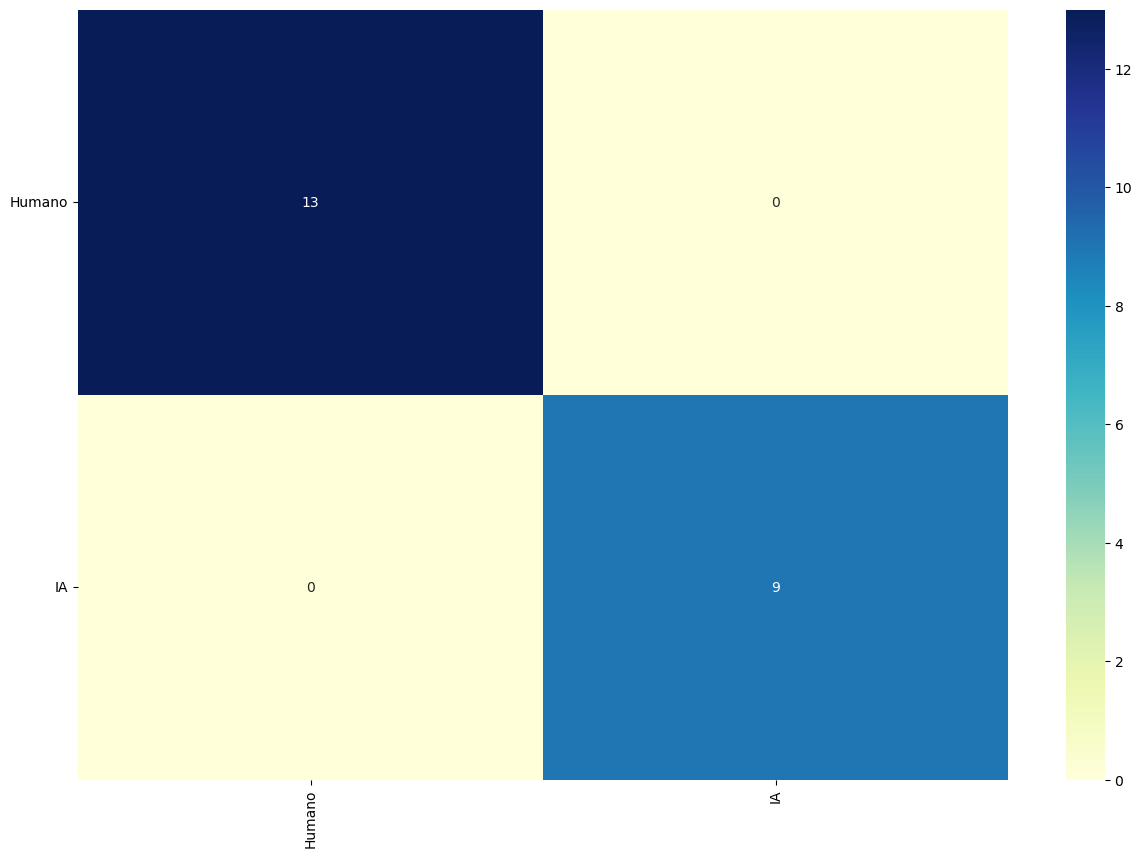

In [57]:
%matplotlib inline
debug_print(mnb_test_predictions, source_test, ['Humano', 'IA'])

In [58]:
d, t = get_wrong_predictions(mnb_test_predictions, source_test, sentence_test)

d1, d0 = d[t=='Humano'], d[t=='IA']

if(len(d1)>0): print("Se esperaba: ", original_values[1], " y se predijo: ", original_values[0], " para:\n ", d1[d1.index[0]])
if(len(d0)>0): print("Se esperaba: ", original_values[0], " y se predijo: ", original_values[1], " para:\n ", d0[d0.index[0]])

In [59]:
tv_matrix_test = tv.transform(norm_test_corpus_accenture)

mnb_test_predictions = mnb_classifier.predict(tv_matrix_test)

print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == type_test_accenture))

Multinomial Naive Bayes, porcentaje de aciertos en test: 0.8739495798319328


              precision    recall  f1-score   support

      Humano       0.98      0.77      0.86        62
          IA       0.80      0.98      0.88        57

    accuracy                           0.87       119
   macro avg       0.89      0.88      0.87       119
weighted avg       0.89      0.87      0.87       119



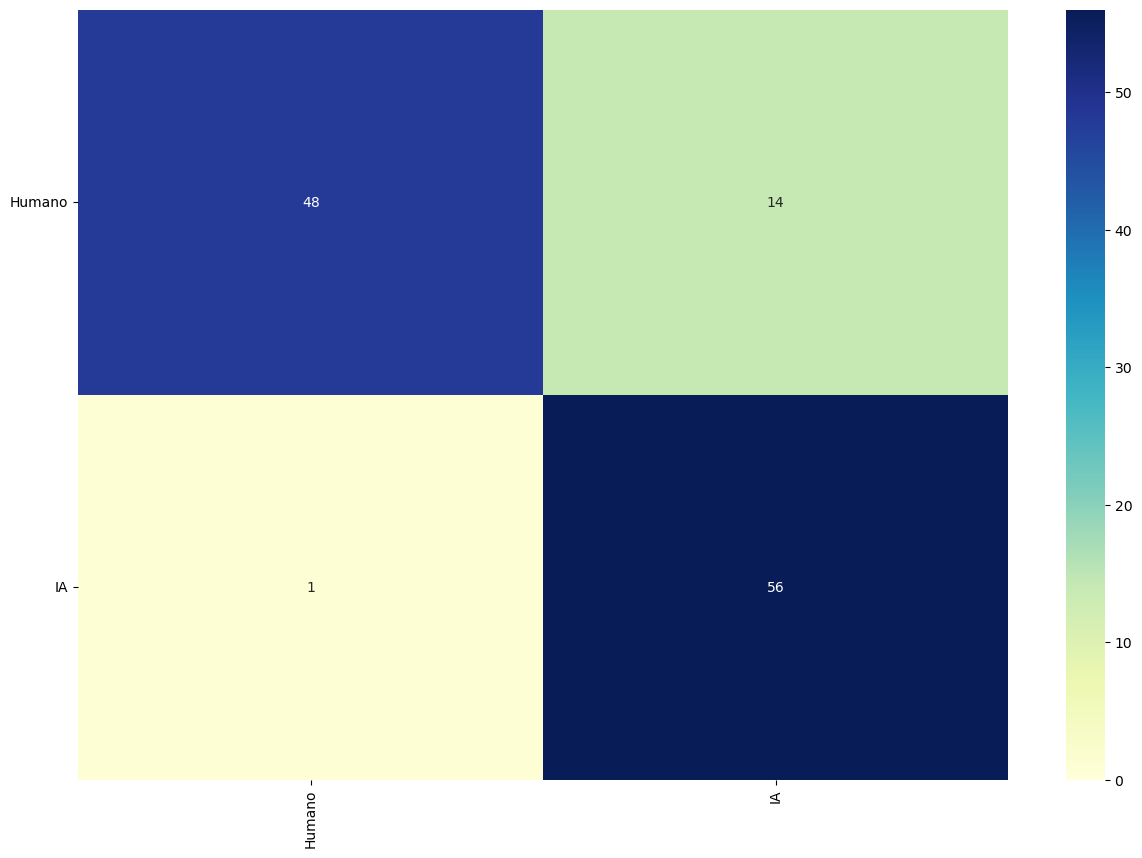

In [60]:
%matplotlib inline
debug_print(mnb_test_predictions, type_test_accenture, ['Humano', 'IA'])

In [61]:
original_values = ['Humano', 'IA']

#Vamos a sacar algunas predicciones en las que nuestro modelo se ha equivocado.
d, t = get_wrong_predictions(tree_test_predictions, type_test_accenture, test_accenture)

d1, d0 = d[t =='Humano'], d[t=='IA']

if(len(d1)>0): print("Se esperaba: ", original_values[1], " y se predijo: ", original_values[0], " para:\n ", d1[0])
print("\n")
if(len(d0)>0): print("Se esperaba: ", original_values[0], " y se predijo: ", original_values[1], " para:\n ", d0[0])

Se esperaba:  IA  y se predijo:  Humano  para:
  El cazador había perdido todas sus herramientas de caza, pero se dio cuenta de que no las necesitaba porque podía alimentarse de las frutas que crecían en los árboles. Se puso muy contento con esta determinación y decidió que, cuando llegara a la ciudad, les diría a sus amigos que no practicaría esta actividad nunca más, porque había aprendido a respetar a la naturaleza.


Se esperaba:  Humano  y se predijo:  IA  para:
  En una ciudad futurista donde la tecnología había avanzado más allá de la imaginación, un joven científico trabajaba incansablemente en su laboratorio subterráneo. Había descubierto una forma revolucionaria de viajar en el tiempo, pero su invención era peligrosa y planteaba preguntas éticas fundamentales. Mientras los poderes gubernamentales y corporativos intentaban apoderarse de su descubrimiento, él se debatía entre la promesa de cambiar el pasado y el temor de alterar el curso de la historia de la humanidad de manera